In [1]:
#!pip install pycaret

from pycaret.utils import version
version()

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

1.0.0


In [2]:
train = pd.read_csv("../data/loan_prediction_train.csv")

In [3]:
print(train.shape)
train.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
from pycaret import classification

In [5]:
classification_setup = classification.setup(data= train, target='Loan_Status')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,4638
1,Target Type,Binary
2,Label Encoded,"N: 0, Y: 1"
3,Original Data,"(614, 13)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [6]:
classification_dt = classification.create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8140,0.7359,0.9333,0.8235,0.8750,0.5169
1,0.7907,0.7192,0.9000,0.8182,0.8571,0.4691
2,0.8140,0.7141,0.9667,0.8056,0.8788,0.4926
3,0.7907,0.7628,0.8333,0.8621,0.8475,0.5144
4,0.8140,0.7359,0.9333,0.8235,0.8750,0.5169
5,0.7209,0.6638,0.8276,0.7742,0.8000,0.3402
6,0.7442,0.6810,0.8621,0.7812,0.8197,0.3833
7,0.7674,0.7352,0.8276,0.8276,0.8276,0.4704
8,0.7209,0.6638,0.8276,0.7742,0.8000,0.3402
9,0.8333,0.7732,0.9310,0.8438,0.8852,0.5836


In [7]:
classification_xgb = classification.create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7907,0.7692,0.9333,0.8000,0.8615,0.4432
1,0.7442,0.7359,0.8667,0.7879,0.8254,0.3512
2,0.7907,0.6744,0.9667,0.7838,0.8657,0.4145
3,0.8140,0.7744,0.9667,0.8056,0.8788,0.4926
4,0.8372,0.7385,1.0000,0.8108,0.8955,0.5446
5,0.8372,0.7549,1.0000,0.8056,0.8923,0.5743
6,0.7442,0.7315,0.8966,0.7647,0.8254,0.3582
7,0.8140,0.7217,0.9310,0.8182,0.8710,0.5426
8,0.8372,0.7906,1.0000,0.8056,0.8923,0.5743
9,0.8333,0.7401,0.9655,0.8235,0.8889,0.5638


In [8]:
tune_catboost = classification.tune_model('catboost',n_iter=50, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8372,0.8077,0.9667,0.8286,0.8923,0.5669
1,0.8140,0.7846,1.0000,0.7895,0.8824,0.4658
2,0.7674,0.5974,0.9333,0.7778,0.8485,0.3658
3,0.8372,0.8000,1.0000,0.8108,0.8955,0.5446
4,0.8140,0.7513,0.9667,0.8056,0.8788,0.4926
5,0.8140,0.8399,0.9310,0.8182,0.8710,0.5426
6,0.7442,0.7315,0.8966,0.7647,0.8254,0.3582
7,0.8140,0.8128,0.9310,0.8182,0.8710,0.5426
8,0.8372,0.8596,1.0000,0.8056,0.8923,0.5743
9,0.8333,0.7851,0.9655,0.8235,0.8889,0.5638


In [9]:
boosting = classification.ensemble_model(classification_dt, method= 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8372,0.7526,0.9667,0.8286,0.8923,0.5669
1,0.7907,0.6974,0.9333,0.8000,0.8615,0.4432
2,0.8140,0.7141,0.9667,0.8056,0.8788,0.4926
3,0.8140,0.7141,0.9667,0.8056,0.8788,0.4926
4,0.8372,0.7526,0.9667,0.8286,0.8923,0.5669
5,0.7442,0.6810,0.8621,0.7812,0.8197,0.3833
6,0.7442,0.6810,0.8621,0.7812,0.8197,0.3833
7,0.7674,0.7352,0.8276,0.8276,0.8276,0.4704
8,0.7209,0.6638,0.8276,0.7742,0.8000,0.3402
9,0.8333,0.7732,0.9310,0.8438,0.8852,0.5836


In [10]:
blender = classification.blend_models(estimator_list=[classification_dt, classification_xgb])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7907,0.0,0.9000,0.8182,0.8571,0.4691
1,0.7442,0.0,0.8333,0.8065,0.8197,0.3801
2,0.7907,0.0,0.9333,0.8000,0.8615,0.4432
3,0.7907,0.0,0.8333,0.8621,0.8475,0.5144
4,0.8140,0.0,0.9333,0.8235,0.8750,0.5169
5,0.7209,0.0,0.8276,0.7742,0.8000,0.3402
6,0.7209,0.0,0.8276,0.7742,0.8000,0.3402
7,0.7674,0.0,0.8276,0.8276,0.8276,0.4704
8,0.7209,0.0,0.8276,0.7742,0.8000,0.3402
9,0.8095,0.0,0.8966,0.8387,0.8667,0.5346


In [11]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.827600,0.747700,0.982900,0.808700,0.886900,0.535100
1,Gradient Boosting Classifier,0.820600,0.767700,0.982900,0.802100,0.882900,0.512800
2,Linear Discriminant Analysis,0.815900,0.755700,0.979400,0.799300,0.879800,0.500500
3,Ridge Classifier,0.813600,0.000000,0.976100,0.798700,0.878100,0.495300
4,Extra Trees Classifier,0.813600,0.755000,0.969400,0.802400,0.877400,0.499500
5,Ada Boost Classifier,0.811300,0.757800,0.945700,0.811300,0.873300,0.511200
6,Logistic Regression,0.808900,0.753900,0.956000,0.804400,0.873000,0.496200
7,Random Forest Classifier,0.804300,0.751700,0.942600,0.806900,0.868700,0.491400
8,Extreme Gradient Boosting,0.804300,0.743100,0.952600,0.800600,0.869700,0.485900
9,Naive Bayes,0.781000,0.732000,0.908600,0.801200,0.850700,0.442200


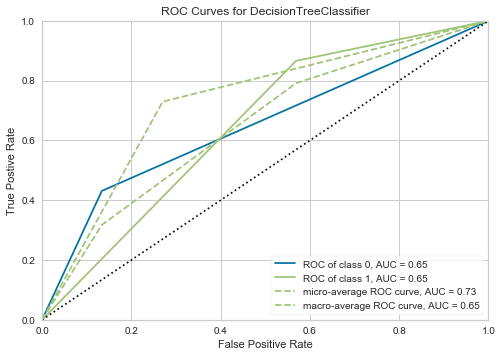

In [12]:
# AUC-ROC plot
classification.plot_model(classification_dt, plot = 'auc')

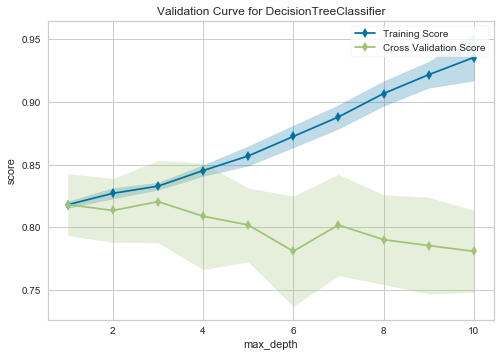

In [13]:
# Validation Curve
classification.plot_model(classification_dt, plot = 'vc')

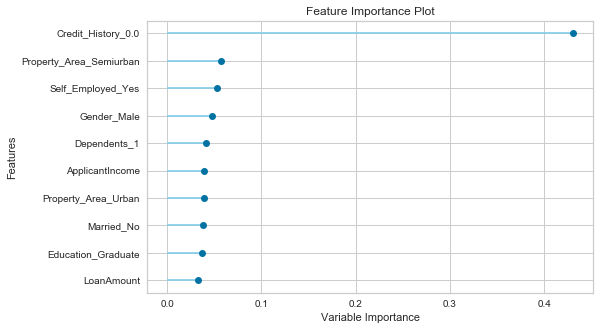

In [14]:
# Dimension Learning
classification.plot_model(classification_xgb, plot = 'feature')

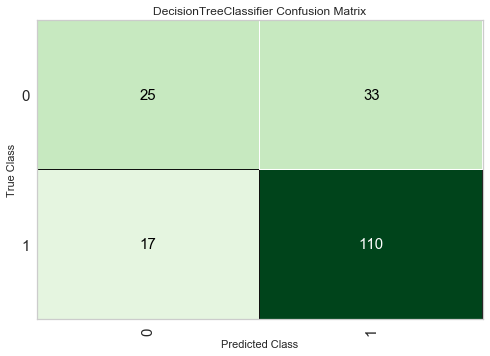

In [15]:
# Confusion Matrix
classification.plot_model(classification_dt, plot = 'confusion_matrix')

In [16]:
classification.evaluate_model(classification_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

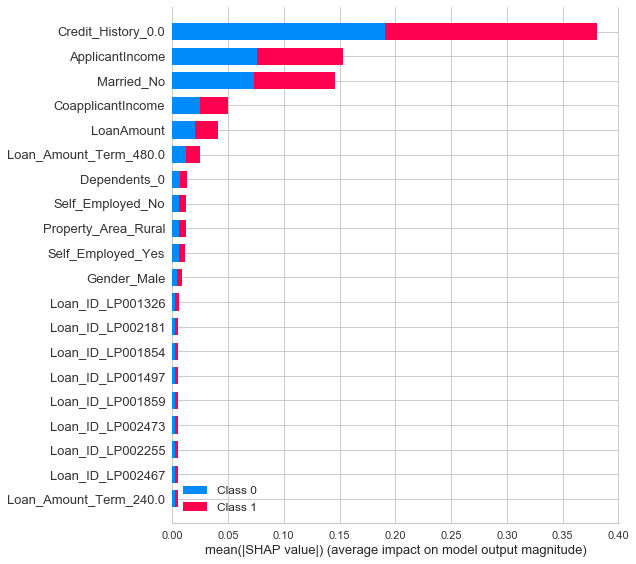

In [17]:
classification.interpret_model(classification_dt)

In [18]:
test = pd.read_csv('../data/loan_prediction_test.csv')

In [19]:
predictions = classification.predict_model(classification_dt, data=test)

In [23]:
predictions.Label.value_counts()

1    284
0     83
Name: Label, dtype: int64

In [26]:
output = predictions[['Loan_ID','Label']]
output['Loan_Status'] = np.where(output['Label'] == 1 , 'Y', 'N')
output.drop('Label',inplace =True, axis =1)
output.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [27]:
output.to_csv("../predictions/pycaret_predictions.csv", index=False)

In [29]:
classification.save_model(classification_dt, '../models/pycaret_model_1')

Transformation Pipeline and Model Succesfully Saved
